In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency

import re
from datetime import datetime
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read file
data = pd.read_csv('preprocessing_data.csv')

In [3]:
len(data)

31654

In [4]:
data.head()

,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
0,185000.0,2023-10-13,Terraced,3,1,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,NaN,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion
1,875000.0,2023-06-16,Detached,5,3,Freehold,"['** Iconic Victorian residence **', '** 5 Bed...",** Fully refurbished Victorian town house ** H...,Band: C,"Llanbadarn Road, Llanbadarn Fawr, Aberystwyth,...","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1315985...,Mid Wales,Ceredigion
2,875000.0,2022-06-01,Detached,10,6,Freehold,"['EPC: E', 'Council Tax Band: F', 'Broadband-...","Windrush House, dating back to 1872, has under...",Band: F,"Windrush, Llanrhystud, Ceredigion.","Fine and Country West Wales, Aberystwyth",The Gallery\r\nStation Approach\r\nAlexandra R...,https://www.rightmove.co.uk/properties/8539838...,Mid Wales,Ceredigion
3,860000.0,2023-08-01,Detached,6,1,Freehold,['Handsome country house. Wealth of character ...,Handsome late Georgian country house enjoying ...,Band: G,"Llanilar, Aberystwyth, Ceredigion, SY23","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1238905...,Mid Wales,Ceredigion
4,835000.0,2023-01-04,Detached,5,6,Freehold,['** Nothing Compares - Exclusive Seaside Prop...,Nothing Compares ! An exclusive seaside proper...,NaN,"Lewis Terrace, New Quay , SA45","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1378149...,Mid Wales,Ceredigion


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31654 entries, 0 to 31653
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             31654 non-null  float64
 1   date              31654 non-null  object 
 2   property_type     31654 non-null  object 
 3   bedrooms          31654 non-null  int64  
 4   bathrooms         31654 non-null  int64  
 5   tenure            31654 non-null  object 
 6   key_features      27886 non-null  object 
 7   description_text  31654 non-null  object 
 8   council_tax       19029 non-null  object 
 9   address           31654 non-null  object 
 10  agent_name        31654 non-null  object 
 11  agent_address     31630 non-null  object 
 12  url               31654 non-null  object 
 13  part              31654 non-null  object 
 14  area              31654 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 3.6+ MB


In [6]:
data['price'].describe()

count     31654.000000
mean     277091.313262
std      155022.641188
min       10000.000000
25%      164496.250000
50%      240000.000000
75%      350000.000000
max      875000.000000
Name: price, dtype: float64

In [7]:
from scipy.stats import skew, kurtosis

# Assuming 'data' is your DataFrame and 'price' is the column of interest
price_data = data['price']

# Calculate statistics
stats = {
    'Min': price_data.min(),
    'Max': price_data.max(),
    'Median': price_data.median(),
    'Mean': price_data.mean(),
    '1st Quartile': price_data.quantile(0.25),
    '3rd Quartile': price_data.quantile(0.75),
    'IQR': price_data.quantile(0.75) - price_data.quantile(0.25),
    'Variance': price_data.var(),
    'Standard Deviation': price_data.std(),
    'Skewness': skew(price_data),
    'Kurtosis': kurtosis(price_data)
}

# Create a DataFrame to display the statistics
stats_table = pd.DataFrame(stats, index=['Price'])

# Display the table
print(stats_table)


           Min       Max    Median           Mean  1st Quartile  3rd Quartile  \
Price  10000.0  875000.0  240000.0  277091.313262     164496.25      350000.0   

             IQR      Variance  Standard Deviation  Skewness  Kurtosis  
Price  185503.75  2.403202e+10       155022.641188  1.223218  1.435298  


In [8]:
data['price_thousands'] = data['price']/1000

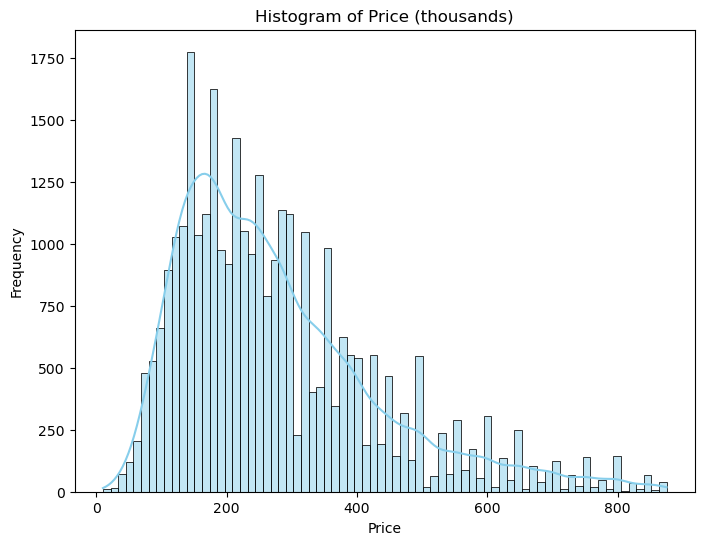

In [9]:

# Plotting histogram with KDE line for 'price'
plt.figure(figsize=(8, 6))
sns.histplot(data['price_thousands'], kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Price (thousands)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()


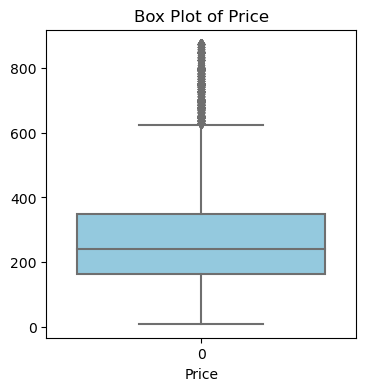

In [10]:

# Creating a box plot for 'price' using Seaborn
plt.figure(figsize=(4, 4))
sns.boxplot(data['price_thousands'], color='skyblue')
plt.title('Box Plot of Price')
plt.xlabel('Price')

plt.show()


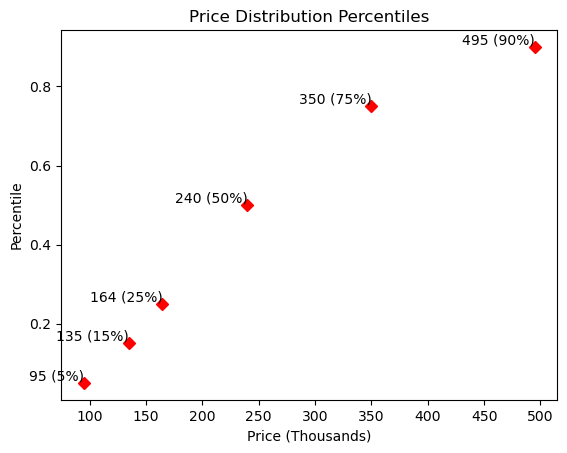

In [11]:
# Percentiles

percentiles = np.array([5, 15, 25, 50, 75, 90])
percentile_values = np.percentile(data['price_thousands'], percentiles)

# Create a plot
plt.plot(percentile_values, percentiles / 100, marker='D', color='red', linestyle='none')

# Add text labels to the points with both 'Price' and percentile values
for i, (percentile_value, percentile) in enumerate(zip(percentile_values, percentiles)):
    plt.text(percentile_value, percentile / 100, f'{percentile_value:.0f} ({percentile}%)', ha='right', va='bottom')

plt.xlabel('Price (Thousands)')
plt.ylabel('Percentile')
plt.title('Price Distribution Percentiles')

# Show the plot
plt.show()

In [12]:
# Convert to datetime
data['date'] = pd.to_datetime(data['date'])

# Number properties sold per year
count_by_year = data['date'].dt.year.value_counts()
count_by_year

2023    30334
2022     1219
2021       74
2020       14
2018        7
2019        5
2017        1
Name: date, dtype: int64

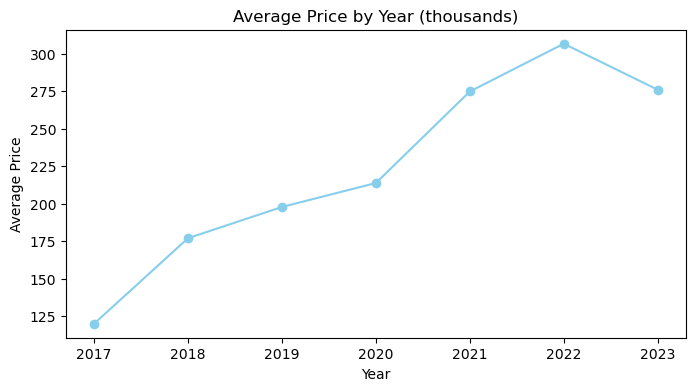

In [13]:
# Extract the year from the 'date' column and calculate the average price per year
data['Year'] = data['date'].dt.year  # Extract year
average_price_by_year = data.groupby('Year')['price_thousands'].mean()  # Calculate average price per year

# Plotting the average price by year using a line plot
plt.figure(figsize=(8, 4))
average_price_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Price by Year (thousands)')
plt.xlabel('Year')
plt.ylabel('Average Price')

plt.show()


In [14]:
# Filter data for the year 2022
data_2022 = data[data['date'].dt.year == 2022]

# Filter data for the year 2023
data_2023 = data[data['date'].dt.year == 2023]

In [15]:
# Generate descriptive statistics for 'Price' for each year
price_descriptive_stats_2022 = data_2022['price'].describe()
price_descriptive_stats_2023 = data_2023['price'].describe()

# Display the descriptive statistics for 'Price' for each year
print("Statistics for Price in 2022:")
print(price_descriptive_stats_2022)

print("\nStatistics for Price in 2023:")
print(price_descriptive_stats_2023)

Statistics for Price in 2022:
count      1219.000000
mean     306642.083675
std      175109.842996
min       45000.000000
25%      169972.500000
50%      275000.000000
75%      395000.000000
max      875000.000000
Name: price, dtype: float64

Statistics for Price in 2023:
count     30334.000000
mean     275979.938518
std      154048.810437
min       10000.000000
25%      162500.000000
50%      240000.000000
75%      350000.000000
max      875000.000000
Name: price, dtype: float64


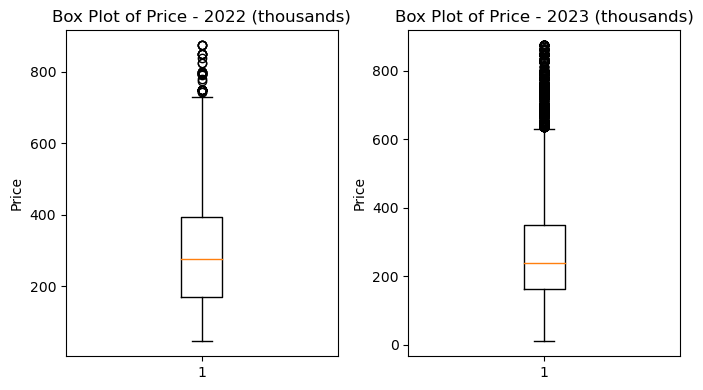

In [16]:
# Box plots for 2022 and 2023
plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)  # Create a subplot for 2016
plt.boxplot(data_2022['price_thousands'])
plt.title('Box Plot of Price - 2022 (thousands)')
plt.ylabel('Price')

plt.subplot(1, 2, 2)  # Create a subplot for 2017
plt.boxplot(data_2023['price_thousands'])
plt.title('Box Plot of Price - 2023 (thousands)')
plt.ylabel('Price')

plt.tight_layout() 
plt.show()

### T-test
##### Test hypothesis:

H0: Mean_2022 = Mean_2023

H1: Mean_2022 <> Mean_2023

In [17]:
from scipy import stats


In [18]:
alpha = 0.05
t, p = stats.ttest_ind(data_2022['price_thousands'], data_2023['price_thousands'])

print('- alpha = %.2f, p = %.15f' % (alpha, p))

if (p <= alpha):
    print('Reject the null hypothesis ==> Mean_2022 <> Mean_2023')
else:
    print('Fail to reject the null hypothesis ==> Mean_2022 = Mean_2023')

- alpha = 0.05, p = 0.000000000012596
Reject the null hypothesis ==> Mean_2022 <> Mean_2023


In [19]:
t, p

(6.775719789455678, 1.2596183484385896e-11)

In [20]:
data['price'].min()

10000.0

In [21]:
# One-way ANOVA
# F-statistic và p-value
fvalue, pvalue = stats.f_oneway(data_2022['price_thousands'], data_2023['price_thousands'])
print('   F-statistic = %.4f, p-value = %.4f' %(fvalue, pvalue))

   F-statistic = 45.9104, p-value = 0.0000


In [22]:
# Levene test: assess whether the variances of two or more groups are equal
levene, pvalue = stats.levene(data_2022['price_thousands'], data_2023['price_thousands'])
print('* Levene-statistic = %.4f, p-value = %.9f' % (levene, pvalue))

* Levene-statistic = 37.6102, p-value = 0.000000001


### bedrooms

In [23]:
data['bedrooms'].value_counts()

3     13994
2      7743
4      6473
5      1515
1      1289
6       382
7       129
8        54
9        31
10       16
12        8
11        8
13        5
15        4
14        2
16        1
Name: bedrooms, dtype: int64

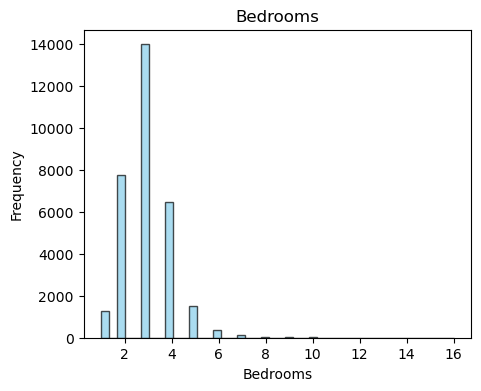

In [24]:
# Plotting a histogram for 'bedrooms'
plt.figure(figsize=(5, 4))
plt.hist(data['bedrooms'], bins=44,color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')
plt.title('Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

plt.show()


### bathrooms

In [25]:
data['bathrooms'].value_counts()

1     18894
2      9799
3      2284
4       455
5       113
6        43
7        24
8        14
0         7
9         7
10        5
11        3
15        2
14        2
13        1
16        1
Name: bathrooms, dtype: int64

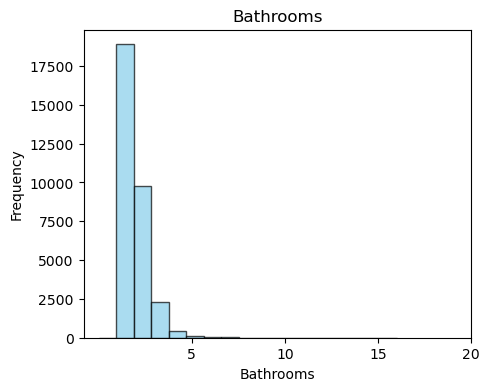

In [26]:

# Plotting a histogram for 'bathrooms'
plt.figure(figsize=(5, 4))
plt.hist(data['bathrooms'], bins=17, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')
plt.title('Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')

# Setting specific tick marks on the x-axis
plt.xticks([5, 10, 15, 20])

plt.show()


### property_type

In [27]:
property_counts = data['property_type'].value_counts()
property_counts

Detached                  7853
Semi-Detached             6626
Terraced                  5911
Detached Bungalow         1931
End of Terrace            1909
Apartment                 1382
Flat                      1365
Bungalow                  1305
Semi-Detached Bungalow     608
House                      569
Cottage                    498
Town House                 285
Ground Flat                216
Park Home                  149
Lodge                      137
Maisonette                 132
Retirement Property        127
Link Detached House        125
Barn Conversion             99
Chalet                      65
Country House               48
Block of Apartments         45
Character Property          42
Mews                        36
Penthouse                   34
Duplex                      33
Mobile Home                 30
Farm House                  21
Terraced Bungalow           20
Coach House                 17
Equestrian Facility          9
Ground Maisonette            9
Cluster 

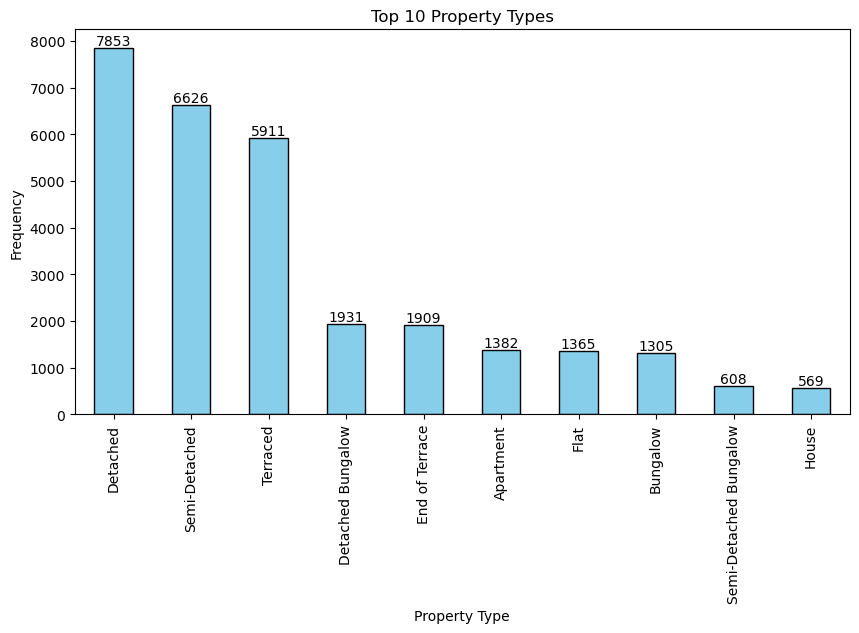

In [28]:
# Get the count of each property type and select the top 10
top_property_counts = data['property_type'].value_counts().head(10)

# Plotting a bar plot for the top 10 property types
plt.figure(figsize=(10, 5))
bars = top_property_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Annotate bars with their counts
for i, count in enumerate(top_property_counts):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')

plt.show()


In [29]:
# total sales by property type
total_sales_by_property_type = data.groupby('property_type')['price'].sum()
sorted_total_sales = total_sales_by_property_type.sort_values(ascending=False)
sorted_total_sales


property_type
Detached                  3.283977e+09
Semi-Detached             1.650638e+09
Terraced                  1.080422e+09
Detached Bungalow         6.151196e+08
End of Terrace            3.860029e+08
Bungalow                  3.822555e+08
Apartment                 2.694604e+08
Flat                      2.091207e+08
House                     1.740273e+08
Cottage                   1.465653e+08
Semi-Detached Bungalow    1.374413e+08
Town House                9.495750e+07
Barn Conversion           4.836335e+07
Link Detached House       3.871359e+07
Ground Flat               3.236183e+07
Lodge                     2.656551e+07
Country House             2.563690e+07
Maisonette                2.424038e+07
Park Home                 2.110004e+07
Character Property        1.911585e+07
Retirement Property       1.600908e+07
Penthouse                 1.400920e+07
Block of Apartments       1.359995e+07
Farm House                1.177195e+07
Chalet                    9.858240e+06
Duplex     

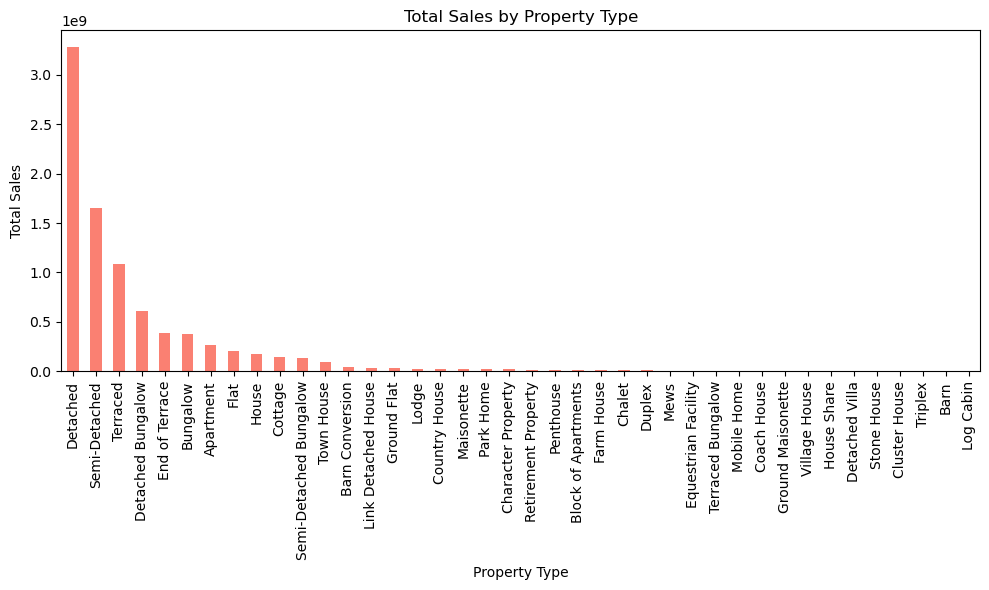

In [30]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sorted_total_sales.plot(kind='bar', color='salmon')
plt.title('Total Sales by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [31]:
# average price by property type
average_price_by_property_type = data.groupby('property_type')['price'].mean()
sorted_average_prices = average_price_by_property_type.sort_values(ascending=False)
sorted_average_prices



property_type
Equestrian Facility       735444.444444
Farm House                560569.047619
Detached Villa            550000.000000
Country House             534102.083333
Barn Conversion           488518.686869
Character Property        455139.285714
Triplex                   445000.000000
Detached                  418181.259264
Penthouse                 412035.294118
Town House                333184.192982
Detached Bungalow         318549.776282
Link Detached House       309708.720000
House                     305847.550088
Block of Apartments       302221.111111
Cottage                   294307.853414
Bungalow                  292916.095785
Stone House               268000.000000
Duplex                    261765.000000
Village House             259983.333333
Semi-Detached             249115.242680
Mews                      229295.138889
Semi-Detached Bungalow    226054.850329
End of Terrace            202201.625458
Coach House               201997.058824
House Share               

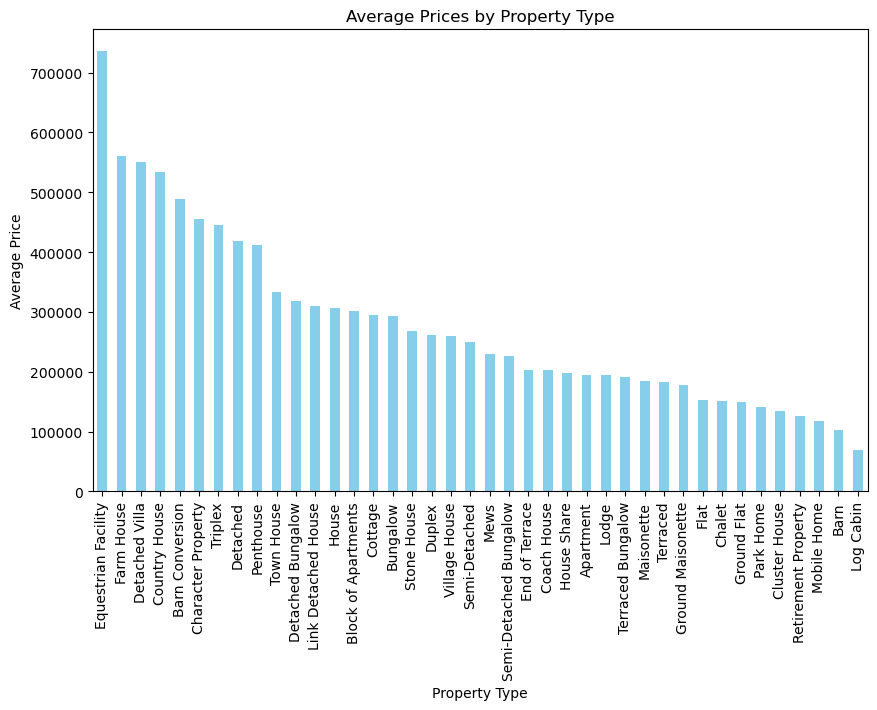

In [32]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sorted_average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')

plt.show()


### tenure

In [33]:
data['tenure'].value_counts()

Freehold             25968
Leasehold             3338
Ask agent             1909
Share of Freehold      224
Ask developer          213
Commonhold               2
Name: tenure, dtype: int64

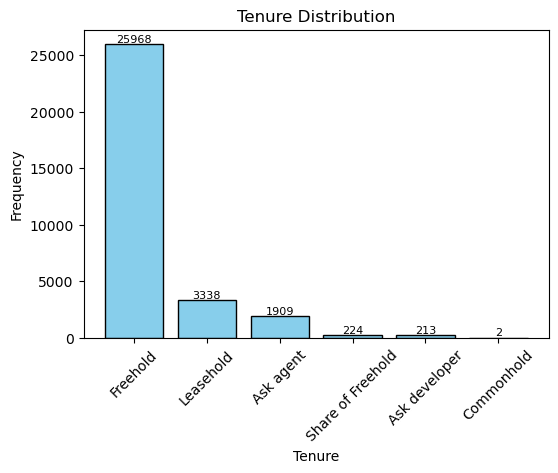

In [34]:
# Get the count of each tenure
tenure_counts = data['tenure'].value_counts()

# Plotting a bar plot for 'tenure'
plt.figure(figsize=(6, 4))
bars = plt.bar(tenure_counts.index, tenure_counts.values, color='skyblue', edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=8)

plt.show()


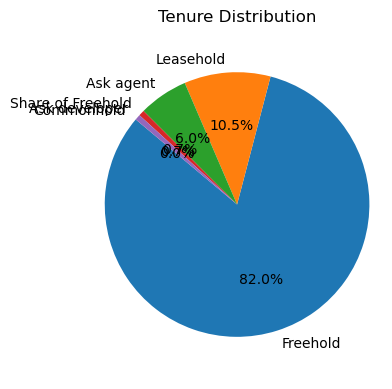

In [35]:
# Plotting a pie chart for 'tenure'
plt.figure(figsize=(4, 4))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tenure Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

### Part

In [36]:
# Number of part
part_counts = data['part'].value_counts()
part_counts

South Wales    17455
North Wales     8943
West Wales      2845
Mid Wales       2411
Name: part, dtype: int64

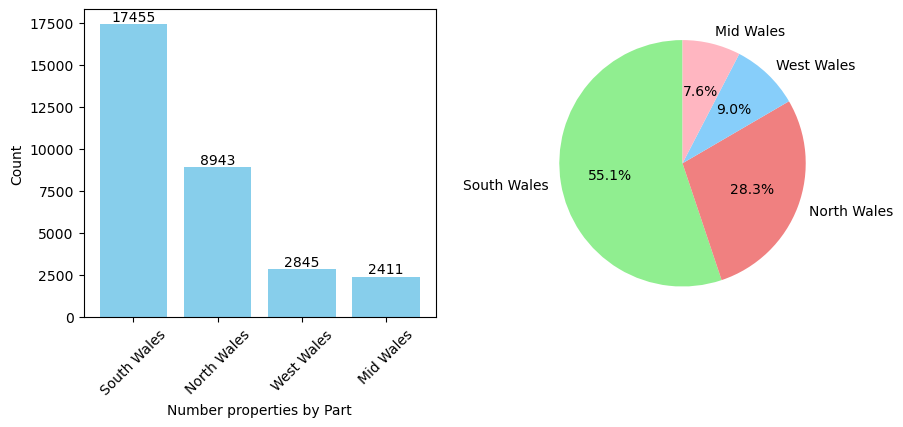

In [37]:
# Creating subplots for both charts
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart
bars = axs[0].bar(part_counts.index, part_counts.values, color='skyblue')
axs[0].set_xlabel('Number properties by Part')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Adding count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval + 0.2, yval, ha='center', va='bottom')

# Pie chart
axs[1].pie(part_counts, labels=part_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])

plt.show()


In [38]:
# revenue_by_part
revenue_by_part = data.groupby('part')['price'].sum().sort_values(ascending=False)
revenue_by_part

part
South Wales    4.699463e+09
North Wales    2.449691e+09
West Wales     8.473473e+08
Mid Wales      7.745476e+08
Name: price, dtype: float64

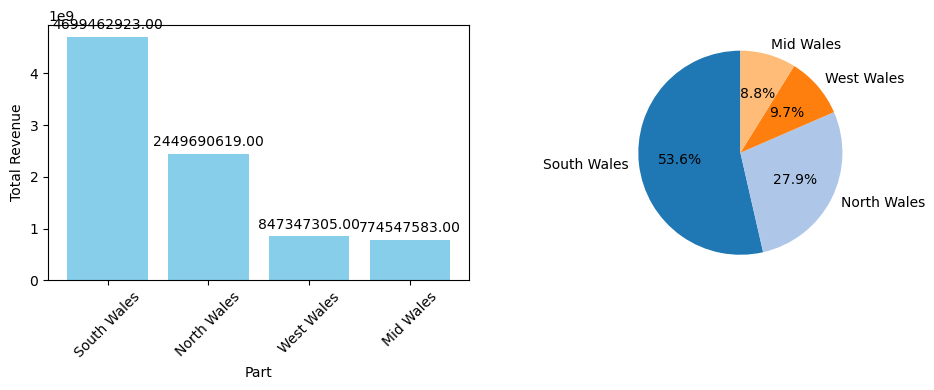

In [39]:

# Creating subplots for both charts
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart for revenue by part
bars = axs[0].bar(revenue_by_part.index, revenue_by_part.values, color='skyblue')
axs[0].set_xlabel('Part')
axs[0].set_ylabel('Total Revenue')
axs[0].tick_params(axis='x', rotation=45)

# Adding revenue labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * max(revenue_by_part.values),
                f'{yval:.2f}', ha='center', va='bottom')

# Pie chart (percentage contribution)
axs[1].pie(revenue_by_part, labels=revenue_by_part.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

plt.tight_layout()
plt.show()


In [40]:
# average_price_by_part
average_price_by_part = data.groupby('part')['price'].mean()
average_price_by_part

part
Mid Wales      321255.737453
North Wales    273922.690261
South Wales    269233.052019
West Wales     297837.365554
Name: price, dtype: float64

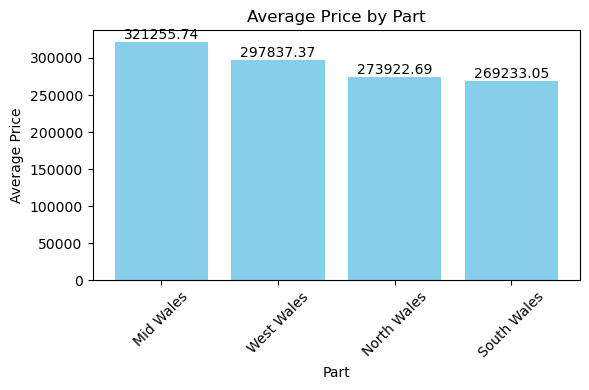

In [41]:
# Sorting the average prices by 'part'
average_price_by_part_sorted = average_price_by_part.sort_values(ascending=False)

# Plotting the bar chart with sorted values
plt.figure(figsize=(6, 4))
bars = plt.bar(average_price_by_part_sorted.index, average_price_by_part_sorted.values, color='skyblue')
plt.xlabel('Part')
plt.ylabel('Average Price')
plt.title('Average Price by Part')
plt.xticks(rotation=45)

# Adding number annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Area

In [42]:
data.head()

,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area,price_thousands,Year
0,185000.0,2023-10-13,Terraced,3,1,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,NaN,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion,185.0,2023
1,875000.0,2023-06-16,Detached,5,3,Freehold,"['** Iconic Victorian residence **', '** 5 Bed...",** Fully refurbished Victorian town house ** H...,Band: C,"Llanbadarn Road, Llanbadarn Fawr, Aberystwyth,...","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1315985...,Mid Wales,Ceredigion,875.0,2023
2,875000.0,2022-06-01,Detached,10,6,Freehold,"['EPC: E', 'Council Tax Band: F', 'Broadband-...","Windrush House, dating back to 1872, has under...",Band: F,"Windrush, Llanrhystud, Ceredigion.","Fine and Country West Wales, Aberystwyth",The Gallery\r\nStation Approach\r\nAlexandra R...,https://www.rightmove.co.uk/properties/8539838...,Mid Wales,Ceredigion,875.0,2022
3,860000.0,2023-08-01,Detached,6,1,Freehold,['Handsome country house. Wealth of character ...,Handsome late Georgian country house enjoying ...,Band: G,"Llanilar, Aberystwyth, Ceredigion, SY23","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1238905...,Mid Wales,Ceredigion,860.0,2023
4,835000.0,2023-01-04,Detached,5,6,Freehold,['** Nothing Compares - Exclusive Seaside Prop...,Nothing Compares ! An exclusive seaside proper...,NaN,"Lewis Terrace, New Quay , SA45","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1378149...,Mid Wales,Ceredigion,835.0,2023


In [43]:
area_counts = data['area'].value_counts()
area_counts

Cardiff               3773
Rhondda Cynon Taff    2081
Conwy                 1927
Gwynedd               1879
Newport               1829
Flintshire            1612
Pembrokeshire         1610
Vale Of Glamorgan     1609
Powys                 1526
Caerphilly            1469
Bridgend              1401
Wrexham               1385
Swansea               1320
Carmarthenshire       1235
Denbighshire          1223
Monmouthshire         1121
Neath Port Talbot      989
Isle Of Anglesey       917
Ceredigion             885
Torfaen                767
Blaenau Gwent          568
Merthyr Tydfil         528
Name: area, dtype: int64

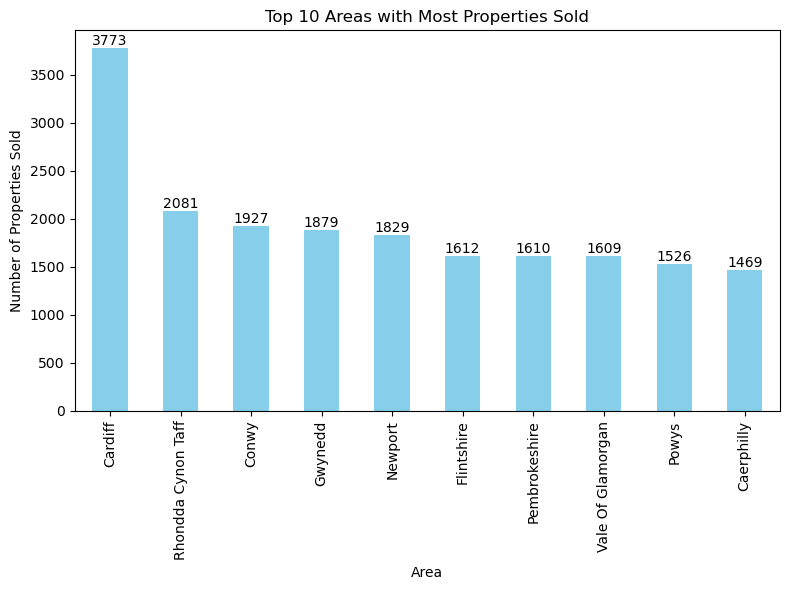

In [44]:
plt.figure(figsize=(8, 6))
ax = area_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Areas with Most Properties Sold')
plt.xlabel('Area')
plt.ylabel('Number of Properties Sold')
plt.tight_layout()

# Adding annotations on top of each bar
for i, count in enumerate(area_counts.head(10)):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()


In [45]:
# Compute average price per area
average_price_by_area = data.groupby('area')['price'].mean().sort_values(ascending=False)
average_price_by_area

area
Monmouthshire         386325.093666
Vale Of Glamorgan     350834.952766
Isle Of Anglesey      339973.412214
Ceredigion            321715.506215
Powys                 320989.095675
Cardiff               304391.147628
Carmarthenshire       300084.710931
Pembrokeshire         296113.470186
Conwy                 276792.619616
Gwynedd               273217.921767
Flintshire            264223.525434
Newport               263129.102788
Bridgend              262086.959315
Denbighshire          262040.100572
Swansea               257212.692424
Wrexham               248935.581949
Torfaen               239549.041721
Caerphilly            234330.698434
Rhondda Cynon Taff    209831.387794
Neath Port Talbot     205286.201213
Merthyr Tydfil        197978.812500
Blaenau Gwent         164221.207746
Name: price, dtype: float64

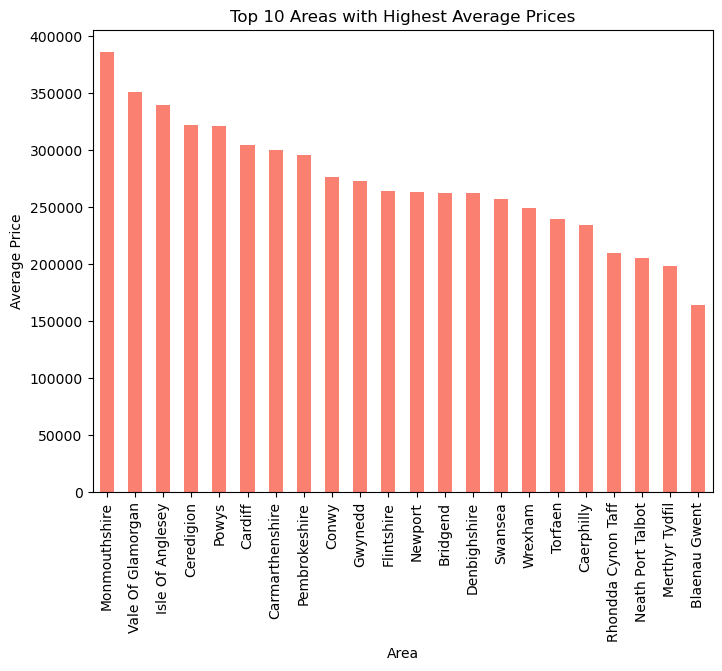

In [46]:
# Plotting the bar chart for top 10 areas with the highest average prices
plt.figure(figsize=(8, 6))
average_price_by_area.plot(kind='bar', color='salmon')
plt.title('Top 10 Areas with Highest Average Prices')
plt.xlabel('Area')
plt.ylabel('Average Price')

plt.show()


#### ANOVA (analysis of variance) for "price" and Categorical variables

In [47]:
data.head()

,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area,price_thousands,Year
0,185000.0,2023-10-13,Terraced,3,1,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,NaN,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion,185.0,2023
1,875000.0,2023-06-16,Detached,5,3,Freehold,"['** Iconic Victorian residence **', '** 5 Bed...",** Fully refurbished Victorian town house ** H...,Band: C,"Llanbadarn Road, Llanbadarn Fawr, Aberystwyth,...","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1315985...,Mid Wales,Ceredigion,875.0,2023
2,875000.0,2022-06-01,Detached,10,6,Freehold,"['EPC: E', 'Council Tax Band: F', 'Broadband-...","Windrush House, dating back to 1872, has under...",Band: F,"Windrush, Llanrhystud, Ceredigion.","Fine and Country West Wales, Aberystwyth",The Gallery\r\nStation Approach\r\nAlexandra R...,https://www.rightmove.co.uk/properties/8539838...,Mid Wales,Ceredigion,875.0,2022
3,860000.0,2023-08-01,Detached,6,1,Freehold,['Handsome country house. Wealth of character ...,Handsome late Georgian country house enjoying ...,Band: G,"Llanilar, Aberystwyth, Ceredigion, SY23","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1238905...,Mid Wales,Ceredigion,860.0,2023
4,835000.0,2023-01-04,Detached,5,6,Freehold,['** Nothing Compares - Exclusive Seaside Prop...,Nothing Compares ! An exclusive seaside proper...,NaN,"Lewis Terrace, New Quay , SA45","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1378149...,Mid Wales,Ceredigion,835.0,2023


In [48]:
# Filling NaN values in 'council_tax' column with 'confirm'
data['council_tax'].fillna('confirm', inplace=True)


In [49]:
from scipy.stats import f_oneway

# Define the columns
columns_to_test = ['property_type', 'tenure', 'council_tax', 'part', 'area', 'Year']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Column', 'F-Statistic', 'P-Value'])

# Iterate over the columns
for column in columns_to_test:
    # Group the 'Price' data by the unique values in the current column
    groups = [data['price'][data[column] == value] for value in data[column].unique()]
    
    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Append the results to the DataFrame
    results = results.append({'Column': column, 'F-Statistic': f_statistic, 'P-Value': p_value}, ignore_index=True)

# Print the results
print(results)

          Column  F-Statistic       P-Value
0  property_type   496.293678  0.000000e+00
1         tenure   417.353118  0.000000e+00
2    council_tax  2263.624005  0.000000e+00
3           part    99.324746  5.455795e-64
4           area   143.552438  0.000000e+00
5           Year     8.923351  9.311832e-10


#### Numerical variables

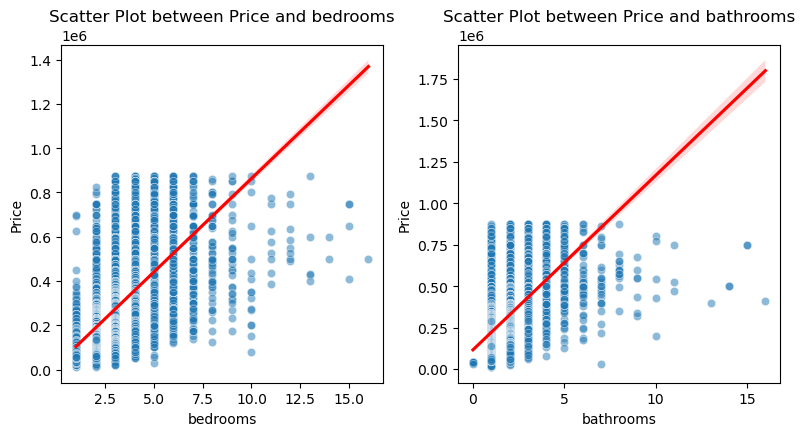

In [50]:
columns_to_plot = ['bedrooms', 'bathrooms']

plt.figure(figsize=(8, 8))

# Create scatter plots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=col, y='price', data=data, alpha=0.5)
    sns.regplot(x=col, y='price', data=data, scatter=False, color='r')  # Use 'price' instead of 'Price'
    plt.title(f'Scatter Plot between Price and {col}')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


In [51]:
def calculate_pearson_correlation(data, columns):
    results = pd.DataFrame(columns=['Column', 'Pearson Correlation Coefficient'])
    
    for column in columns:
        correlation = data['price'].corr(data[column], method='pearson')
        results = results.append({'Column': column, 'Pearson Correlation Coefficient': correlation}, ignore_index=True)
    
    return results

# Columns
columns_corr = ['bedrooms', 'bathrooms']

# Calculate Pearson Correlation Coefficients
correlation_results = calculate_pearson_correlation(data, columns_corr)

# Print the results
print(correlation_results)

      Column  Pearson Correlation Coefficient
0   bedrooms                         0.586029
1  bathrooms                         0.549871


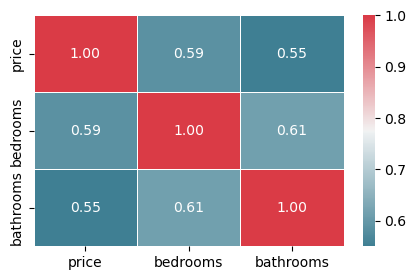

In [52]:
# Correlation heatmap

# Correlation heatmap using Pearson correlation coefficient
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[['price', 'bedrooms', 'bathrooms']].corr(method='pearson'), cmap=colormap, annot=True, linewidths=.4, fmt='.2f', ax=ax)

plt.show()

### description_text

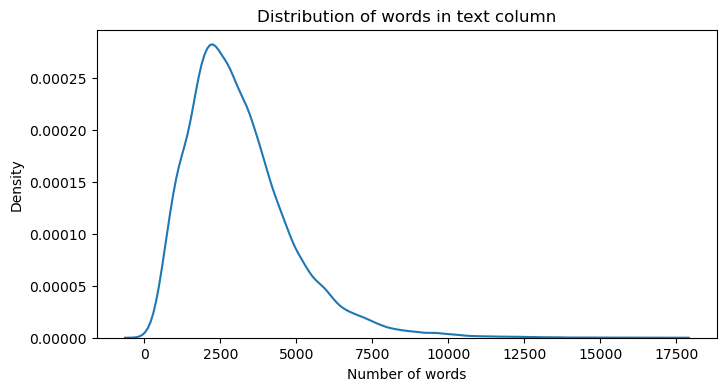

In [53]:
# Distribution of words in text column

data["num of words in text"] = data["description_text"].apply(lambda x: len(x))
plt.figure(figsize=(8,4))
sns.kdeplot(data["num of words in text"])
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

In [54]:
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tinhl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tinhl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tinhl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
# Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers.

def clean_text(text):
    
    #lower case
    text = text.lower()
    # remove text with square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove newline characters
    text = re.sub('\n', '', text)
    # remove numeric sequences
    text = re.sub('\w*\d\w*', '', text)
    #Removing stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])  
    #Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])
    #Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text


In [56]:
data['description_text'] = data['description_text'].apply(lambda x: clean_text(x))

In [57]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data['description_text']=data['description_text'].apply(lambda x: remove_emoji(x))

In [58]:
import nltk
from nltk.tokenize import word_tokenize

# Assuming 'description_text' is the column containing text data
texts = data['description_text'].dropna()  # Drop NaN values if any

# Tokenize and create a frequency distribution
all_words = ' '.join(texts).lower()  # Concatenate all text and convert to lowercase
tokens = word_tokenize(all_words)  # Tokenize the text
frequency_dist = nltk.FreqDist(tokens)  # Create frequency distribution

# large words
large_words=dict([k,v]for k,v in frequency_dist.items() if len(k)>3)
large_words

{'spaciou': 23289,
 'bedroom': 90013,
 'semidetach': 3826,
 'properti': 125331,
 'situat': 16898,
 'small': 7383,
 'villag': 18523,
 'capel': 134,
 'bangor': 745,
 'offer': 51931,
 'mani': 3803,
 'amen': 15866,
 'primari': 7771,
 'school': 17918,
 'public': 4749,
 'hous': 29155,
 'garag': 22639,
 'short': 7629,
 'minut': 3510,
 'drive': 9172,
 'costal': 34,
 'town': 22198,
 'aberystwyth': 653,
 'wide': 4548,
 'rang': 27395,
 'servic': 23020,
 'facil': 7216,
 'hospit': 1696,
 'univers': 1494,
 'nation': 2817,
 'librari': 937,
 'wale': 4573,
 'high': 9865,
 'street': 8147,
 'brand': 880,
 'excit': 719,
 'develop': 6719,
 'tesco': 444,
 'mark': 266,
 'spencer': 125,
 'store': 5919,
 'excel': 8638,
 'transport': 5246,
 'link': 10104,
 'regular': 1145,
 'train': 4275,
 'servicethi': 4,
 'freehold': 4577,
 'boast': 6271,
 'fantast': 4444,
 'countrysid': 6014,
 'view': 45256,
 'doubl': 138878,
 'glaze': 114300,
 'upvc': 55735,
 'window': 134797,
 'throughout': 8984,
 'central': 28284,
 'heat'

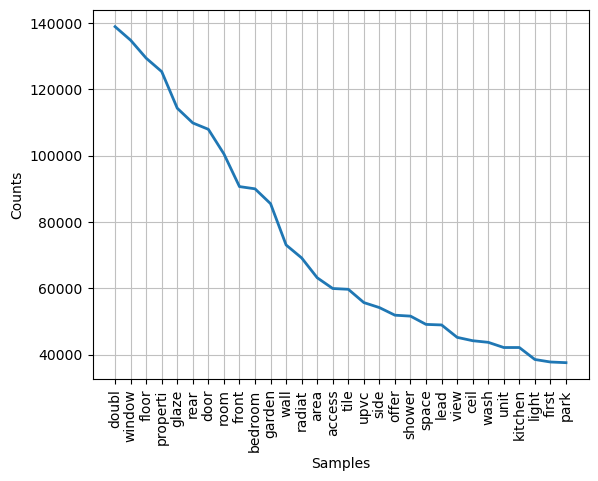

<Axes: xlabel='Samples', ylabel='Counts'>

In [59]:
frequency_dist = nltk.FreqDist(large_words)
frequency_dist
frequency_dist.plot(30,cumulative=False)

In [64]:
from wordcloud import WordCloud


In [65]:
wordcloud = WordCloud(max_font_size=35, max_words=100,background_color="black").generate_from_frequencies(frequency_dist)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")

AttributeError: 'ImageDraw' object has no attribute 'textsize'